# Distribución Chi-Square
###### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2
Una variable aleatoria continua de chi-cuadrado.
###### Para la distribución de chi-cuadrado no central, véase ncx2.
chi2 toma df como parámetro de forma.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

## Estadísticos de la función

Los estadísticos de la función: df:55, mean 55.0, var: 110.0, skew: 0.3813850356982369, kurt: 0.21818181818181817


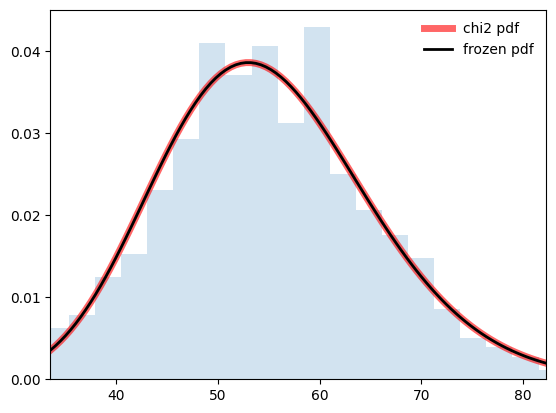

In [104]:
# Estadísticos de la función de distribución
df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
print(f"Los estadísticos de la función: df:{df}, mean {mean}, var: {var}, skew: {skew}, kurt: {kurt}")
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')
rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = chi2.rvs(df, size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

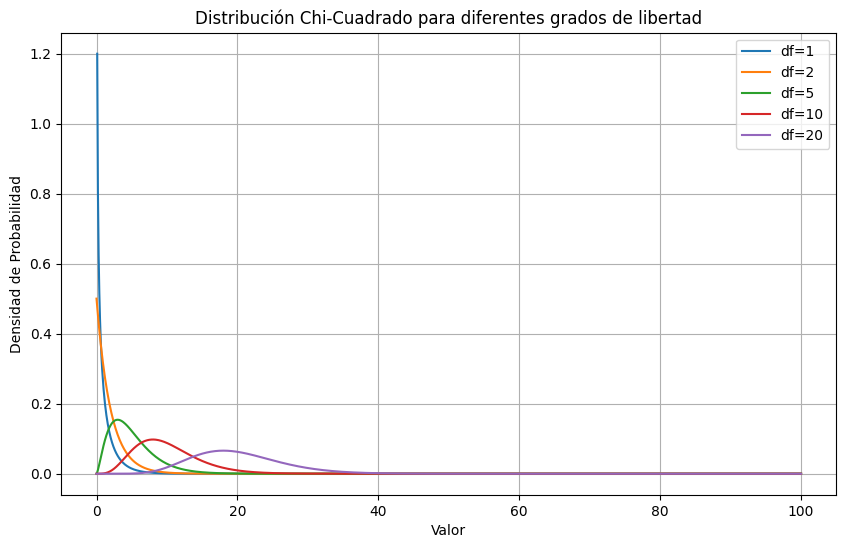

In [105]:
# Grados de libertad
dfs = [1, 2, 5, 10, 20]

# Valores x para la curva
x = np.linspace(0, 100, 1000)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar la distribución chi-cuadrado para cada grado de libertad
for df in dfs:
    plt.plot(x, chi2.pdf(x, df), label=f'df={df}')

# Personalizar la gráfica
plt.title('Distribución Chi-Cuadrado para diferentes grados de libertad')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

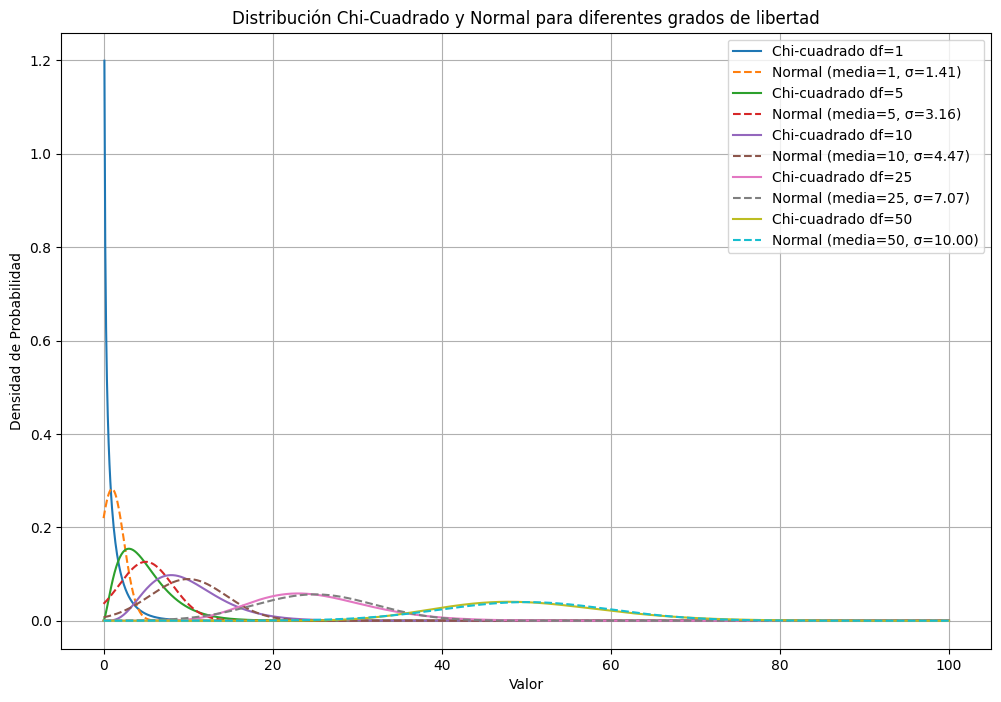

In [106]:
# Grados de libertad
dfs = [1, 5, 10, 25, 50]

# Valores x para la curva
x = np.linspace(0, 100, 1000)

# Crear la figura y los ejes
plt.figure(figsize=(12, 8))

# Graficar la distribución chi-cuadrado y la distribución normal equivalente para cada grado de libertad
for df in dfs:
    chi2_dist = chi2.pdf(x, df)
    normal_dist = norm.pdf(x, loc=df, scale=np.sqrt(2*df))
    
    plt.plot(x, chi2_dist, label=f'Chi-cuadrado df={df}')
    plt.plot(x, normal_dist, linestyle='--', label=f'Normal (media={df}, σ={np.sqrt(2*df):.2f})')

# Personalizar la gráfica
plt.title('Distribución Chi-Cuadrado y Normal para diferentes grados de libertad')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### Valores  críticos e intervalo de confianza Chi-2
Calcule los valores críticos de x2 que determinan las regiones críticas que contienen una área de 0.025 en cada cola. 
Suponga que el tamaño muestral relevante es 10, de manera que el número de grados de libertad es 10-1, o 9.

In [107]:
# Datos
n = 10
df = n - 1
confidence_level = 0.95
alpha = 1 - confidence_level

mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
print(f"Los estadísticos de la función: df:{df}, mean {mean}, var: {var}, skew: {skew}, kurt: {kurt}")

# Primero verificar los requisitos de t-Student
# a. Muestra aleatoria simple: cada posible muestra del mismo tamaño n tiene la misma posibilidad de ser elegida.
# b. Asumimos que la media está normalmente distribuida. Esto es requisito aún cuando la muestra sea grande.

# Valores críticos t para un nivel de confianza del 95%
# Una forma de calcular el valor crítico t es buscando el percentil correspondiente al (IC/2)
# area que queda fuera del intervalo de confianza dividido dos (da un t pedazo de la cola izquierda)
x2_critical1 = chi2.ppf(alpha/2, df)
print(f"Este es el valor critico X2: {x2_critical1} a la izquierda de la media: {mean}.")
x2_critical2 = chi2.ppf(1 - alpha/2, df)
print(f"Este es el valor critico X2: {x2_critical2} a la derecha de la media: {mean}.")

# Hay una función más concreta para esto que es .interval()
x2min, x2max = chi2.interval(confidence_level, df)
print(f"Intevalo de confianza {x2min} < µ < {x2max}")

Los estadísticos de la función: df:9, mean 9.0, var: 18.0, skew: 0.9428090415820634, kurt: 1.3333333333333333
Este es el valor critico X2: 2.700389499980359 a la izquierda de la media: 9.0.
Este es el valor critico X2: 19.02276779864163 a la derecha de la media: 9.0.
Intevalo de confianza 2.700389499980359 < µ < 19.02276779864163


### Valores críticos e Intervalo de confianza mejorado para la varianza y esl desvío estandard
+ Existe un factor de corrección para mejorar la esimación del intervalo de confianza
+ Y por lo tanto con esta corrección mejora la estimación de la varianza y del desvío de una población.

**Ejemplo**  Intervalo de  confianza para  pesos  de  monedas  de  1 centavo 
+ En la actualidad las monedas de 1 centavo de dólar se acuñan con una desviación estándar de 0.0165 g (de acuerdo con el conjunto de datos 14 del apén- dice B). 
+ Se prueba un nuevo equipo con la intención de mejorar la calidad al reducir la variación. 
+ Se obtiene una muestra aleatoria simple de 10 monedas de 1 centavo acuñadas con el equipo nuevo. 
+ Una gráfica cuantilar normal y un histograma indican que los pesos provienen de una población distribuida normalmente, 
    + y la muestra tiene una **desviación estándar de 0.0125 g**. 
+ Utilice los resultados muestrales para construir un estimado de un intervalo de confianza del 95% de s,
    + la desviación estándar de los pesos de monedas de 1 centavo fabricadas con el equipo nuevo. 
+ Con base en los resultados, ¿parece que el equipo nuevo sirve para reducir la variación de los pesos?

In [108]:


# Primero verificar los requisitos para el cálculo de la varianza con Chi-2.
# a. Muestra aleatoria simple: cada posible muestra del mismo tamaño n tiene la misma posibilidad de ser elegida.
# b. La población está normalmente distribuida. Aunque n = 10. Este requisito es excuyente.
# c. No hay datos de 𝞂, pero si de s.

# Valores críticos e intervalo de confianza mejorado
n = 10              # Tamaño de la muestra
s = 0.0125          # Desviación estándar de la muestra
df = n - 1          # Grados de libertad
confidence = 0.95   # Intervalo de confianza

mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
print(f"Los estadísticos de la función: df:{df}, mean {mean}, var: {var}, skew: {skew}, kurt: {kurt}")

# Valores críticos chi-cuadrado
# Hay una función más concreta para esto que es .interval()
chi2_lower, chi2_upper = chi2.interval(confidence_level, df)
print(f"Intevalo de confianza por valores críticos de chi2: {chi2_lower} < X2 < {chi2_upper}")

# Límites del intervalo de confianza para la varianza
# Usando los valores críticos de 2.700 y 19.023, 
# la desviación estándar muestral de s=0.0125 y n=10, 
# construimos el intervalo de confianza del 95% al evaluar lo siguiente:
lower_var = (df * s**2) / chi2_upper
upper_var = (df * s**2) / chi2_lower
print(f"Intevalo de confianza ajustado para la varianza: {lower_var} < 𝞂2 < {upper_var}")

# Límites del intervalo de confianza para la desviación estándar
lower_std = np.sqrt(lower_var)
upper_std = np.sqrt(upper_var)
print(f"\nIntevalo de confianza ajustado para desvío estandar: {lower_std} < 𝞂={s} < {upper_std} ??: Si!")

Los estadísticos de la función: df:9, mean 9.0, var: 18.0, skew: 0.9428090415820634, kurt: 1.3333333333333333
Intevalo de confianza por valores críticos de chi2: 2.700389499980359 < X2 < 19.02276779864163
Intevalo de confianza ajustado para la varianza: 7.39245736942874e-05 < 𝞂2 < 0.0005207582091436175

Intevalo de confianza ajustado para desvío estandar: 0.008597940084362498 < 𝞂=0.0125 < 0.022820127281494674 ??: Si!


**Interpretación**  
+ Con base en este resultado, tenemos una confianza del 95% de que los límites de 0.0086 g y 0.0228 g SI contienen el valor real de s=0.0125.
+ Pero: Observe que este intervalo **también incluye la desviación estándar de 0.0165 g para los pesos de las monedas que se fabrican actualmente**. 
+ No parece que el nuevo equipo reduzca significativamente la variación. 
+ **Aun cuando la desviación estándar de la muestra (0.0125 g) es menor que la desviación estándar actual de (0.0165) g,**
    + **no es lo suficientemente baja para ser significativa.**


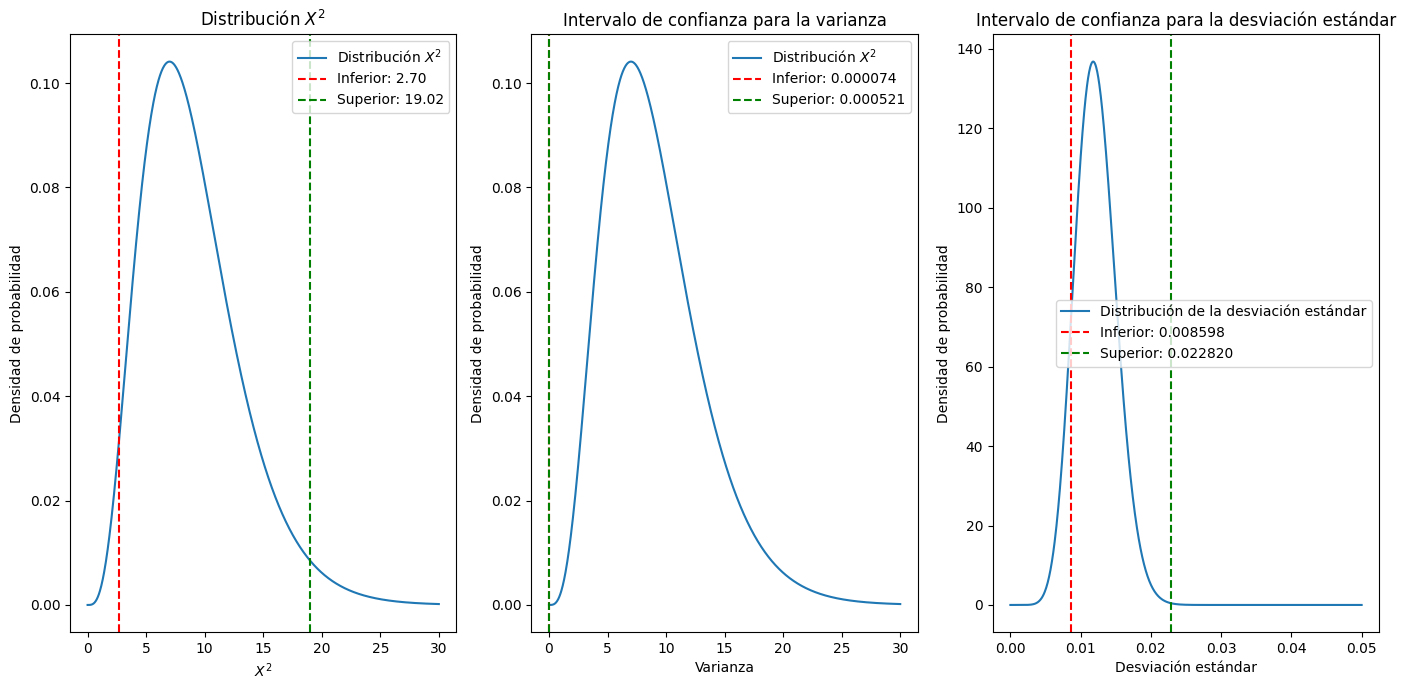

In [109]:
# Gráfico de la distribución chi-cuadrada
x = np.linspace(0, 30, 1000)
y = chi2.pdf(x, df)

plt.figure(figsize=(14, 7))

# Subplot 1: Distribución chi-cuadrada
plt.subplot(1, 3, 1)
plt.plot(x, y, label='Distribución $X^2$')
plt.axvline(chi2_lower, color='r', linestyle='--', label=f'Inferior: {chi2_lower:.2f}')
plt.axvline(chi2_upper, color='g', linestyle='--', label=f'Superior: {chi2_upper:.2f}')
plt.title('Distribución $X^2$')
plt.xlabel('$X^2$')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Subplot 2: Varianza
plt.subplot(1, 3, 2)
plt.plot(x, y, label='Distribución $X^2$')
plt.axvline(lower_var, color='r', linestyle='--', label=f'Inferior: {lower_var:.6f}')
plt.axvline(upper_var, color='g', linestyle='--', label=f'Superior: {upper_var:.6f}')
plt.title('Intervalo de confianza para la varianza')
plt.xlabel('Varianza')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Subplot 3: Desviación estándar
plt.subplot(1, 3, 3)
std_x = np.linspace(0, 0.05, 1000)
std_y = chi2.pdf((std_x**2) * df / s**2, df) * 2 * std_x * df / s**2
plt.plot(std_x, std_y, label='Distribución de la desviación estándar')
plt.axvline(lower_std, color='r', linestyle='--', label=f'Inferior: {lower_std:.6f}')
plt.axvline(upper_std, color='g', linestyle='--', label=f'Superior: {upper_std:.6f}')
plt.title('Intervalo de confianza para la desviación estándar')
plt.xlabel('Desviación estándar')
plt.ylabel('Densidad de probabilidad')
plt.legend()

plt.tight_layout()
plt.show()

In [110]:
from statsmodels.stats.power import GofChisquarePower
import numpy as np

# Parámetros de entrada
alpha = 0.05  # Nivel de significancia (95% de confianza)
E = 0.10      # Error relativo permitido (10%)
effect_size = 0.10  # Tamaño del efecto, igual al error relativo permitido

# Crear una instancia de la clase GofChisquarePower
power_analysis = GofChisquarePower()

# Calcular el tamaño de la muestra
try:
    sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=0.80, n_bins=2)
    sample_size = np.ceil(sample_size).astype(int)  # Redondear hacia arriba al número entero más cercano
    print(f"Tamaño de la muestra necesario: {sample_size}")
except Exception as e:
    print(f"No se pudo calcular el tamaño de muestra: {e}")


Tamaño de la muestra necesario: 785


In [115]:
import numpy as np
from scipy.stats import chi2

def calculate_sample_size_chisquare(alpha, E, sigma):
    """
    Calcula el tamaño de muestra necesario para estimar la varianza de una población
    usando la distribución Chi-cuadrado.
    
    Parameters:
    alpha (float): Nivel de significancia (e.g., 0.05 para 95% de confianza)
    E (float): Error permitido (en términos de la varianza, e.g., 0.10 para 10%)
    sigma (float): Estimación inicial de la desviación estándar de la población
    
    Returns:
    int: Tamaño de la muestra necesario
    """
    # Verificar que sigma y E sean positivos
    if sigma <= 0 or E <= 0:
        raise ValueError("sigma y E deben ser mayores que 0.")
    
    # Estimar la varianza
    sigma2 = sigma ** 2
    
    # Inicializar el tamaño de muestra con un valor razonable
    n = 30
    i = 0
    while True:
        df = n - 1  # Grados de libertad
        # Valores críticos de Chi-cuadrado
        chi2_upper = chi2.ppf(1 - alpha / 2, df)
        chi2_lower = chi2.ppf(alpha / 2, df)
        i += 1
        
        # Validar los valores críticos
        if chi2_upper <= chi2_lower:
            raise ValueError("Los valores críticos de Chi-cuadrado no son válidos.")
        
        # Fórmula ajustada para el tamaño de muestra
        n_new = ((chi2_upper + chi2_lower) * sigma2) / (2 * E ** 2)
        
        print(f"i:{i}, n:{n}, n_new: {n_new}")
        # Redondear el tamaño de muestra al entero más cercano
        n_new = np.ceil(n_new).astype(int)
        
        # Verificar si el tamaño de muestra converge
        if abs(n_new - n) < 1:
            break
        
        n = n_new
    
    return n

# Parámetros de entrada
alpha = 0.05  # Nivel de significancia (95% de confianza)
E = 0.10      # Error permitido (en términos de la varianza)
sigma = 1.0   # Estimación inicial de la desviación estándar

# Calcular el tamaño de la muestra
try:
    sample_size = calculate_sample_size_chisquare(alpha, E, sigma)
    print(f"Tamaño de la muestra necesario: {sample_size}")
except Exception as e:
    print(f"Error: {e}")


i:1, n:30, n_new: 3088.46787497697
i:2, n:3089, n_new: 308989.4217648153
i:3, n:308990, n_new: 30899089.430499885
i:4, n:30899090, n_new: 3089909089.4305863
i:5, n:-2147483648, n_new: 214748364889.43057
Tamaño de la muestra necesario: -2147483648


C:\Users\Dani\AppData\Local\Temp\ipykernel_27436\1382195016.py:43: RuntimeWarning: invalid value encountered in cast
  n_new = np.ceil(n_new).astype(int)
C:\Users\Dani\AppData\Local\Temp\ipykernel_27436\1382195016.py:46: RuntimeWarning: overflow encountered in scalar subtract
  if abs(n_new - n) < 1:
C:\Users\Dani\AppData\Local\Temp\ipykernel_27436\1382195016.py:28: RuntimeWarning: overflow encountered in scalar subtract
  df = n - 1  # Grados de libertad
